![](../img/banner_day2.png)

<br>

# 2일차 실습(2) - 의사결정 나무(Decision Tree)

<br>
<br>
<div align='right'>강사 성민석</div>
<div align='right'>고려대학교 인공지능학과 박사과정</div>
<div align='right'>(minsuksung@korea.ac.kr)</div>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 제작자의 동의없이 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있으니 주의해주시기 바랍니다.

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#탐색적-데이터-분석" data-toc-modified-id="탐색적-데이터-분석-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>탐색적 데이터 분석</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#피처-엔지니어링" data-toc-modified-id="피처-엔지니어링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>피처 엔지니어링</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#하이퍼파라미터-튜닝" data-toc-modified-id="하이퍼파라미터-튜닝-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>하이퍼파라미터 튜닝</a></span></li><li><span><a href="#성능-평가" data-toc-modified-id="성능-평가-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>성능 평가</a></span></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

![](../img/pipeline.png)

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings(action='ignore')

## 데이터 불러오기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

![](https://camo.githubusercontent.com/6412ebb6737fee70b9575b8ff6bddeeb0efb303d15e69cc1c54f3f61b9a258e4/68747470733a2f2f656e637279707465642d74626e302e677374617469632e636f6d2f696d616765733f713d74626e3a414e64394763545746447a35734e4f7a67637a5f3430757569567939594451594c364d52655975716277624d2d4842476d3154484d6e4b4a4478467936774944484863386432777941524126757371703d434155)

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine_dataset = load_wine()

In [5]:
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- 포르투갈(Portugal) 서북쪽의 대서양을 맞닿고 위치한 비뉴 베르드(Vinho Verde) 지방에서 만들어진 와인을 측정
- 레드와인 샘플 1,599개를 등급과 맛, 산도를 측정해 분석하고 화이트와인 샘플 4,898개를 동일방식으로 분석한 데이터를 제공

피처 설명
- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)

In [7]:
wine_dataset['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine_dataset['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine_dataset['target']  # 와인의 맛(0~10등급)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
wine_dataset['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [14]:
X = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names'])
y = pd.DataFrame(wine_dataset['target'], columns=['target'])

In [75]:
data = pd.concat([X,y], axis=1)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


## 탐색적 데이터 분석
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [64]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [25]:
y.value_counts().sort_index()

target
0         59
1         71
2         48
dtype: int64

In [17]:
import seaborn as sns

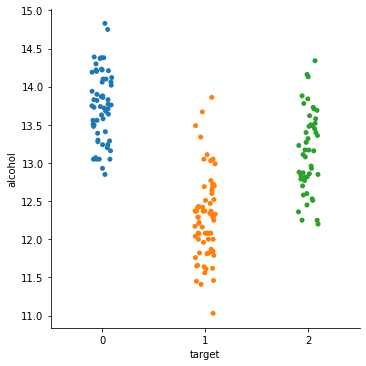

In [81]:
sns.catplot(x='target', y='alcohol', data=data)

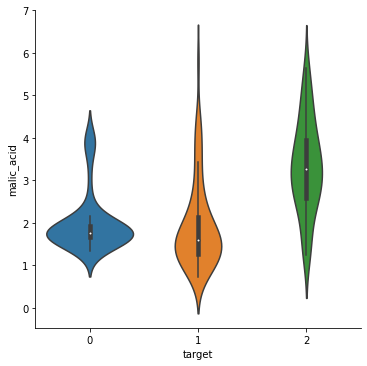

In [79]:
sns.catplot(x='target', y='malic_acid', data=data, kind='violin')

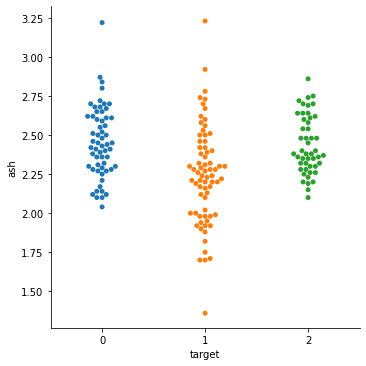

In [83]:
sns.catplot(x='target', y='ash', data=data, kind='swarm')

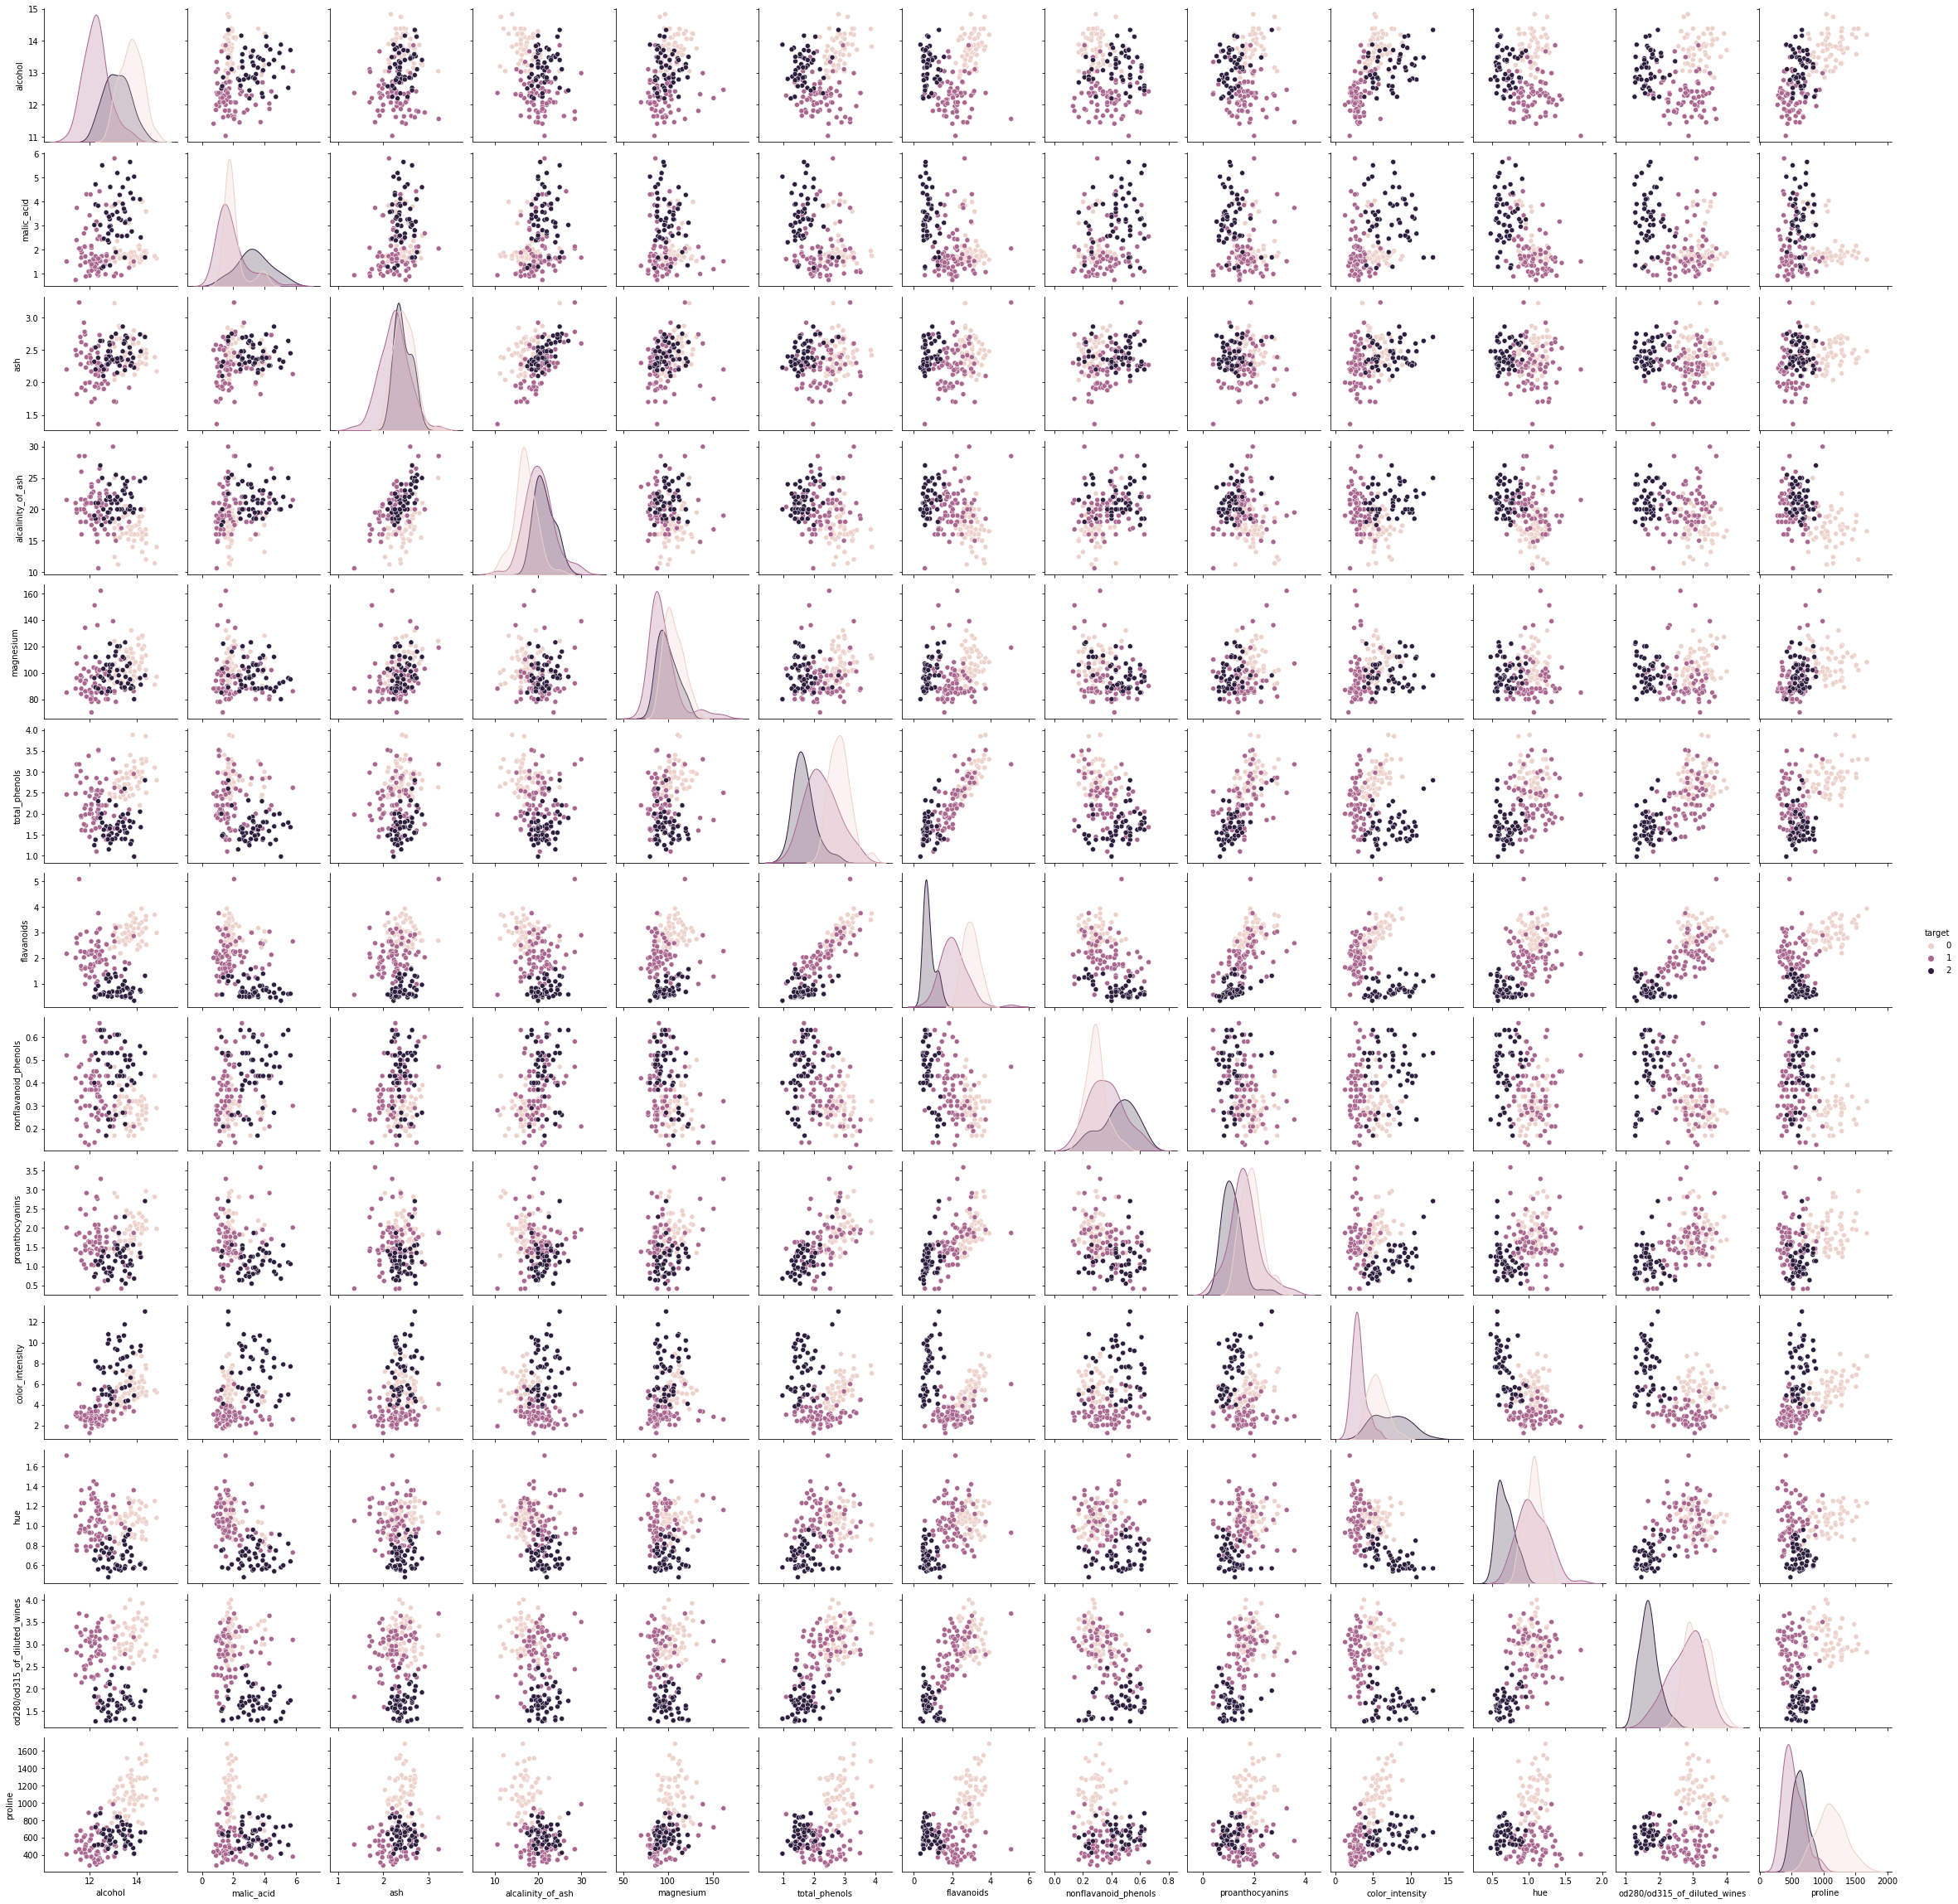

In [84]:
sns.pairplot(data, hue='target')

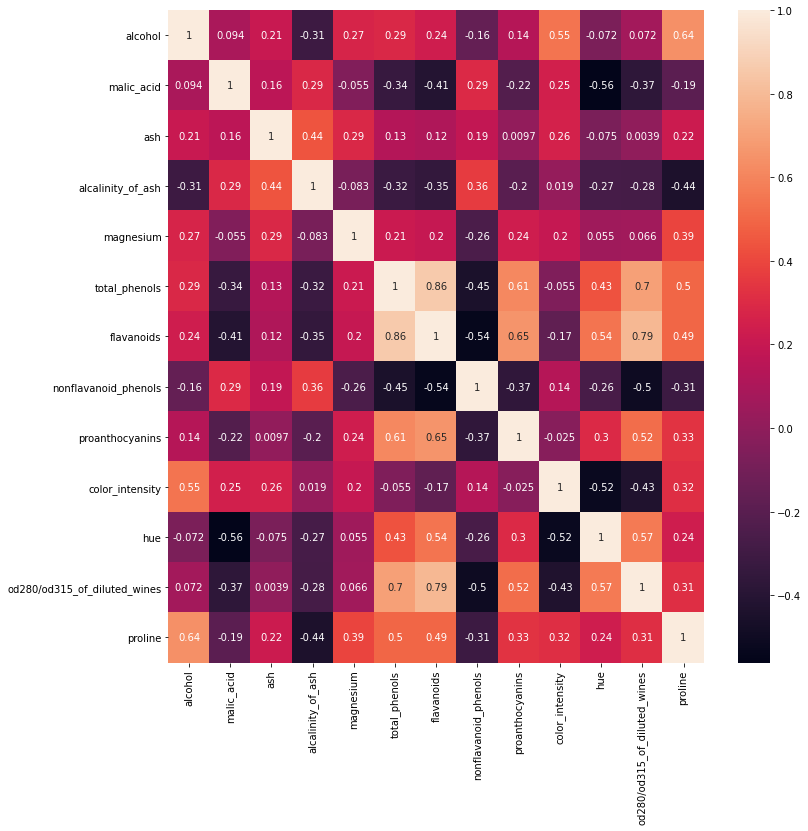

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), annot=True)
plt.show()

## 데이터 전처리
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [26]:
import missingno as msno

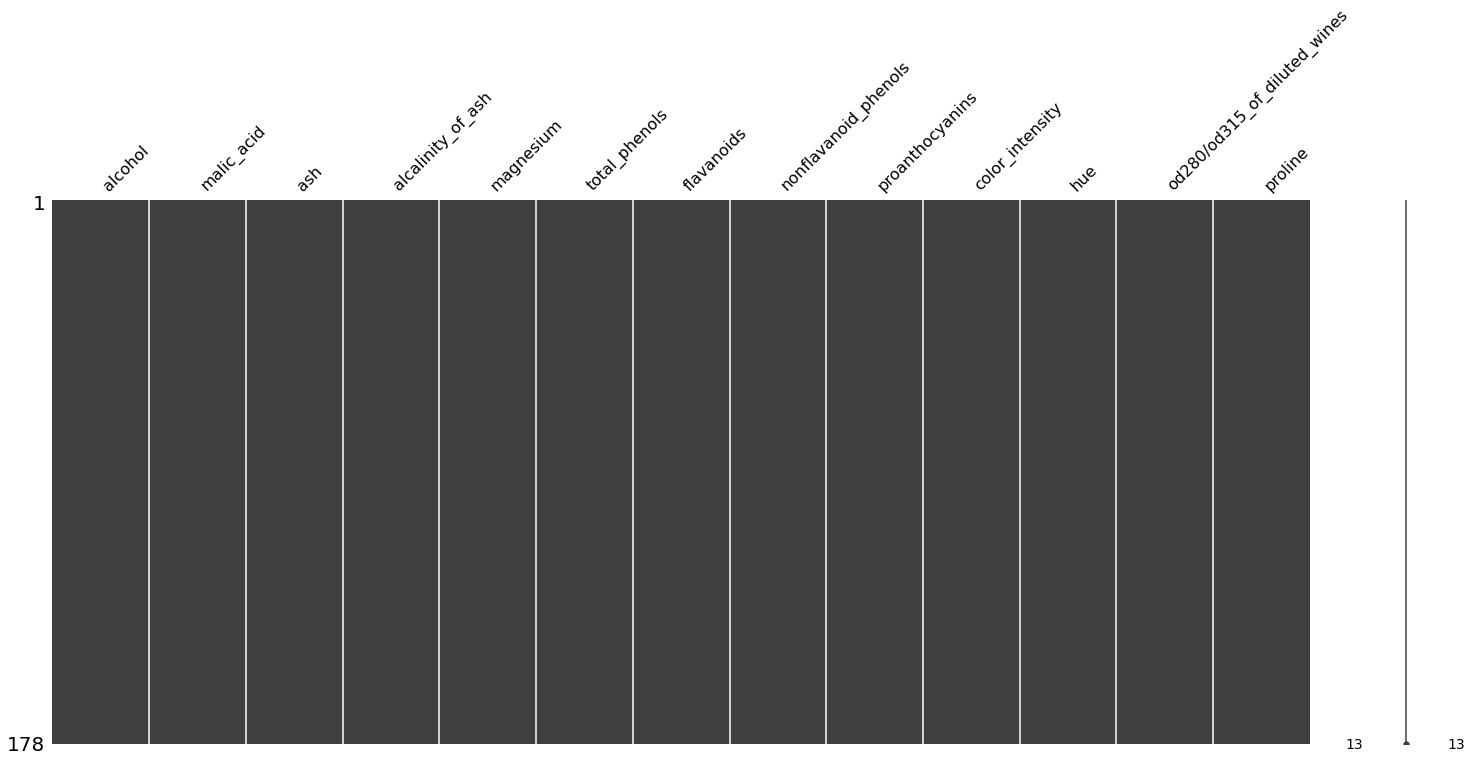

In [27]:
msno.matrix(X)
plt.show()

## 피처 엔지니어링
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [30]:
X_train.shape, X_valid.shape

((142, 13), (36, 13))

In [31]:
y_train.shape, y_valid.shape

((142, 1), (36, 1))

## 모델링
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model  = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.9444444444444444

## 하이퍼파라미터 튜닝
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [35]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'max_depth': [1,2,4,8,16],
    'criterion': ['gini', 'entropy'],
}

In [42]:
from sklearn.model_selection import KFold

kf = KFold(
    random_state=42,
    n_splits=5,
    shuffle=True,
)

In [43]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8, 16]},
             verbose=2)

In [45]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [46]:
grid_search.cv_results_

{'mean_fit_time': array([0.00703487, 0.00764699, 0.00650783, 0.0054081 , 0.00749202,
        0.00722508, 0.00723219, 0.0075356 , 0.00678234, 0.00629129]),
 'std_fit_time': array([0.00043411, 0.00024373, 0.00110039, 0.00080604, 0.00050983,
        0.00011768, 0.00035309, 0.00042164, 0.00110436, 0.00140665]),
 'mean_score_time': array([0.00316625, 0.00335698, 0.0026175 , 0.00245571, 0.00324311,
        0.00325584, 0.0031743 , 0.0032023 , 0.00299964, 0.00256791]),
 'std_score_time': array([1.80745148e-04, 1.29722881e-04, 6.41819460e-04, 6.01757612e-04,
        1.59977737e-04, 6.91934915e-05, 1.55540963e-04, 1.80124351e-04,
        5.77830839e-04, 5.89812728e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_

In [47]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007035,0.000434,0.003166,0.000181,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.482759,0.517241,0.464286,0.571429,0.571429,0.521429,0.044223,10
1,0.007647,0.000244,0.003357,0.000130,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.896552,0.896552,0.750000,0.892857,0.928571,0.872906,0.062803,8
2,0.006508,0.001100,0.002618,0.000642,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.931034,0.931034,0.821429,0.928571,0.964286,0.915271,0.048750,3
3,0.005408,0.000806,0.002456,0.000602,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.862069,0.931034,0.785714,0.928571,0.964286,0.894335,0.063642,6
4,0.007492,0.000510,0.003243,0.000160,gini,16,"{'criterion': 'gini', 'max_depth': 16}",0.931034,0.931034,0.785714,0.928571,0.964286,0.908128,0.062620,5
5,0.007225,0.000118,0.003256,0.000069,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.482759,0.482759,0.642857,0.678571,0.642857,0.585961,0.085267,9
6,0.007232,0.000353,0.003174,0.000156,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.896552,0.931034,0.857143,0.857143,0.928571,0.894089,0.032527,7
7,0.007536,0.000422,0.003202,0.000180,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.931034,0.965517,0.892857,0.928571,0.928571,0.929310,0.022995,1
8,0.006782,0.001104,0.003000,0.000578,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.862069,0.965517,0.892857,0.964286,0.928571,0.922660,0.040408,2
9,0.006291,0.001407,0.002568,0.000590,entropy,16,"{'criterion': 'entropy', 'max_depth': 16}",0.931034,0.965517,0.892857,0.857143,0.928571,0.915025,0.036962,4


## 성능 평가
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [62]:
from sklearn.metrics import classification_report
y_pred = grid_search.best_estimator_.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



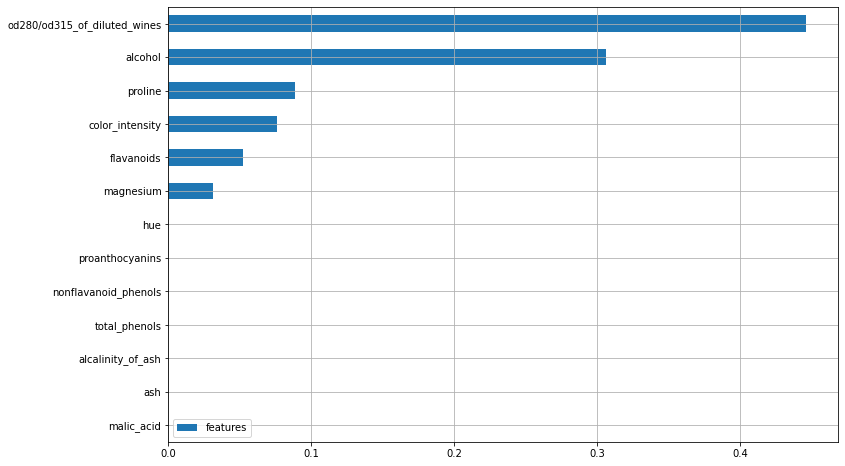

In [61]:
fi_df = pd.DataFrame(grid_search.best_estimator_.feature_importances_, index=X_train.columns, columns=['features'])
fi_df = fi_df.sort_values(by='features')
fi_df.plot(figsize=(12,8), kind='barh')
plt.grid(True)
plt.show()

## 참고자료
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

- https://codedragon.tistory.com/9480
- https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html

<br>

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 모든 자료의 저작권은 성민석에 있으며 제작자의 동의없이 외부로의 무단 복제, 배포 및 전송을 절대로 불허합니다.

<b>Copyright ⓒ 2022. Minsuk Sung. All rights reserved.</b>
</span>

<br>